# Tasks: Machine Learning and Statistics
**Machine Learning and Statistics - Tasks 2023**

 **Introduction**<br>
    This notebook forms a part of the assignment for the module Machine Lerning and Statistics.<br>
    The notebook consist of discussion and solutions to five tasks:<br>
    
> **Tasks**: <br> <p style='text-align: justify;'> 1. Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as math. In this task, you should write a function $\sqrt(x)$ to approximate the square root of a floating point number x without using the power operator or a package.<br><br>Rather, you should use the Newton’s method. Start with an initial guess for the square root called $z_{0}$. You then repeatedly improve it using the following formula, until the difference between some previous guess $z_{i}$ and the next  $z_{i+1}$ is less than some threshold, say 0.01.<br> </p> <br> <p style='text-align: center;'> $z_{i+1} = z_{i} - \frac{z_{i} \times z_{i}-x}{2z_{i}}$ <br> </p><p style='text-align: justify;'><br>2. Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.</p> <br> <p style='text-align: center;'><table><thead><td></td><td>*Biscuit*</td></thead> <thead><tr><th></th><th>Chocolate</th><th>Plain</th></tr></thead><tbody><tr><td rowspan="2">*Drink*</td><th>Coffee</th><td>43</td><td>57</td></tr><tr><th>Tea</th><td>56</td><td>45</td></tr></tbody></table><br> </p><p style='text-align: justify;'>3. Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.<br> </p><p style='text-align: justify;'>4. Using the famous iris data set,suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer. <br> </p> <p style='text-align: justify;'>5. Perform Principal Component Analysis on the iris data set,reducing the number of dimensions to two. Explain the purposeof the analysis and your results. <br> </p> 
   

 **Task 1**<br>
 

In [1]:
def newton_method(number, number_iters = 500):
    a = float(number) # number to get square root of
    for i in range(number_iters): # iteration number
        number = 0.5 * (number + a / number) # update
	  # x_(n+1) = 0.5 * (x_n +a / x_n)
    return number

print(newton_method(20))

4.47213595499958


 **Task 2**<br>

<p style='text-align: justify;'> A chi-square test of independence is used to determine whether or not there is a significant association between two categorical variables. The following hypotheses will be tested: <br> </p> <p style='text-align: center;'> $H_{0}$ There is no relationship between drink preference and biscuit preference.<br> </p> <p style='text-align: center;'> $H_{1}$ There is relationship between drink preference and biscuit preference.<br> </p> 

In [2]:
# import required libraries
import numpy as np

from scipy.stats import chi2_contingency
data = np.array([[43,57], [56,45]])

chi2, p, dof, expected = chi2_contingency(data)

print(f"Chi-squared test: {chi2:.2f}")
print(f"P-value: {p:.5f}")
print(f"Degrees of freedom: {dof}")

Chi-squared test: 2.64
P-value: 0.10447
Degrees of freedom: 1


<p style='text-align: justify;'> With 1 degrees of freedom and alpha = 0.05, using statistical tables to find the critical value of 3.84146. Since chi -squared is not greater then the critical value, we fail to reject the null hypothesis. The p-value for the test comes out to be strictly greater than the alpha value, we will accept our  $H_{0}$. Concluding there is no relationship between drink preference and biscuit preference.<br> </p> 

 **Task 3**<br>

In [14]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import statsmodels.api as sm
from scipy.stats import ttest_ind

In [15]:
df = pd.read_csv('penguins.csv')
#df =pd.read_csv("C://Users/odonovanm/Desktop/programming/MachineLearning/penguins.csv")
#print(df.sample(10))
#df.info()
#print(df.isnull().sum())
mean_bill_length = round(df['bill_length_mm'].mean(),1)
mean_bill_depth = round(df['bill_depth_mm'].mean(),1)
mean_flipper_length = round(df['flipper_length_mm'].mean(),1)
mean_body_mass = round(df['body_mass_g'].mean(),1)

#Remove any null values that might skew the data
df['bill_length_mm'].replace(np.nan , mean_bill_length , inplace=True)
df['bill_depth_mm'].replace(np.nan , mean_bill_depth , inplace=True)
df['flipper_length_mm'].replace(np.nan , mean_flipper_length , inplace=True)
df['body_mass_g'].replace(np.nan , mean_body_mass , inplace=True)

#print(df.isnull().sum())
df.dropna(subset=['sex'] , axis = 0 , inplace = True)

#print(df.isnull().sum())
#print("observation : ",len(df))
Male_Penguins = df.loc[df["sex"] == "MALE", "body_mass_g"]
Female_Penguins = df.loc[df["sex"] == "FEMALE", "body_mass_g"]
print(ttest_ind(Male_Penguins, Female_Penguins))

TtestResult(statistic=8.541720337994516, pvalue=4.897246751596224e-16, df=331.0)


<p style='text-align: justify;'> The p-value < 0.05, means the hypothesis stating the mean of both groups is not significantly different is false and hence rejected.</br>
Hence, you can conclude that the average body mass of male and female penguins significantly varies.</p>

 **Task 4**<br>

 *Exploratory Data Analysis*<br>

<p style='text-align: justify;'> This is perhaps the best known database to be found in the pattern recognition literature. The task is to investigate if one variable within the Iris dataset is separate from the other two variables, which are not separate from eachother. To examine interfence between variables, the easiest method is to visualize the data to determine if patterns exist between variables.</p>

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import pandas as pd

In [16]:
%pip install seaborn
import seaborn as sns

In [17]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
# to display stats about data
df.describe()
# to display no. of samples on each class
df['species'].value_counts()
# to display the number of null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

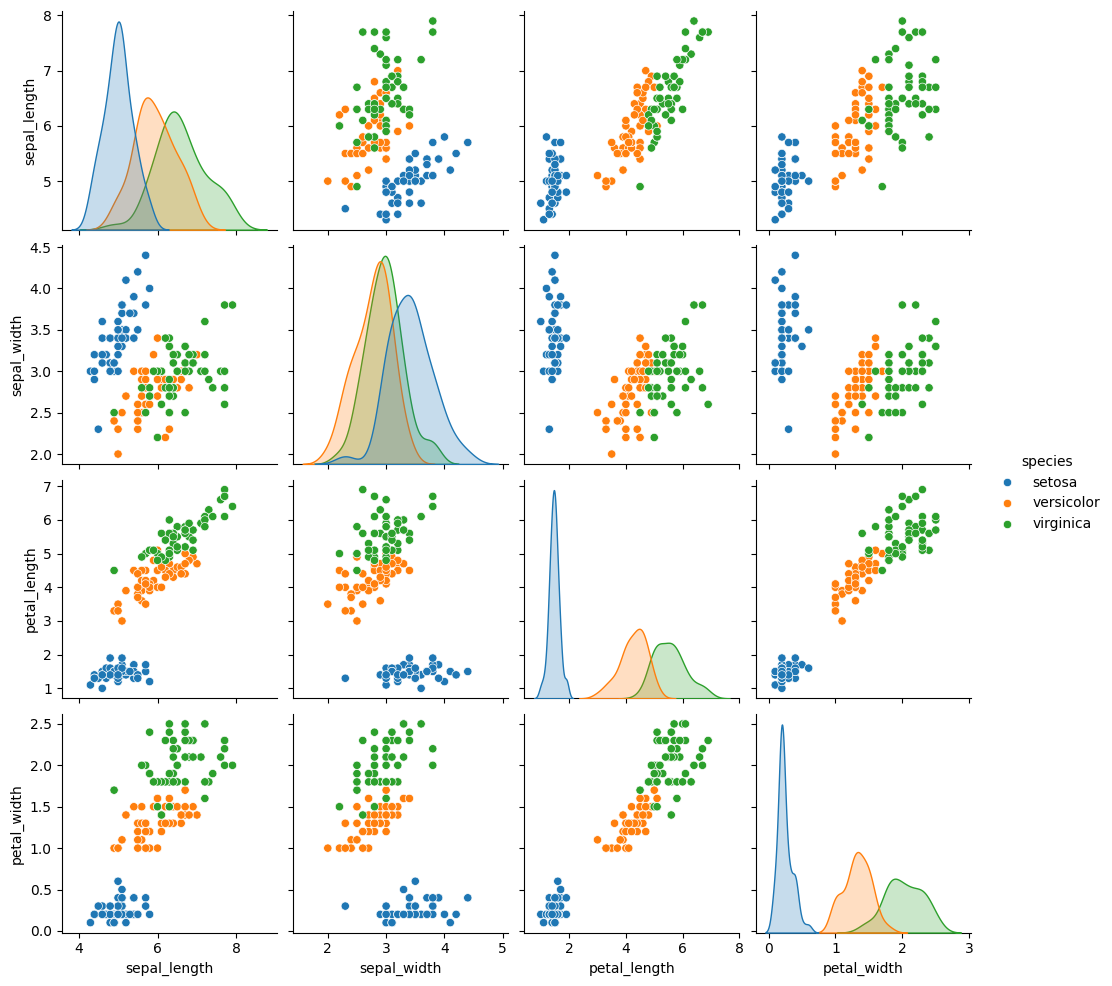

In [22]:
df2 = sns.pairplot(df,hue="species")

<p style='text-align: justify;'> A linearly separable data set is one where the observations or data points can be separated by a straight line drawn through the data. The pair plot is used to figure out a distribution of single variables and the relationship between the other two variables. Setosa flowers are spearate from the other two classes when comparing lenght and width of petals and sepal. To insure that setosa flowers are separate, further visual testing is porformed. The Iris virginica and Iris versicolor clusters blend together a bit, and are not linearly separable.<p>

In [31]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['virginica','versicolor','setosa']

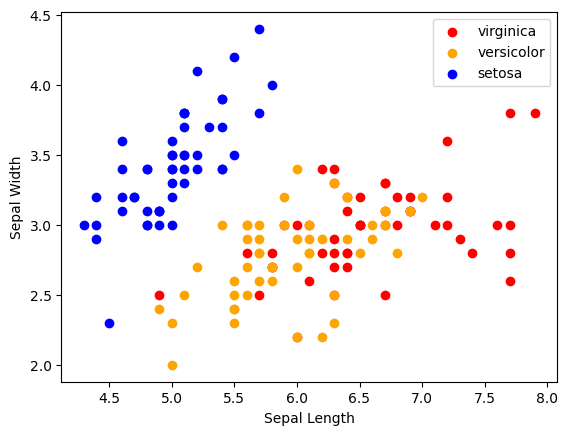

In [32]:
for i in range(3):
    # filter data on each class
    x = df[df['species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

 **Task 5**<br>

 *Principal Component Analysis*<br>

PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible. This form of analysis can be broken down into five steps, which will be examined.
   * Standardize the range of continuous initial variables
   * Compute the covariance matrix to identify correlations
   * Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
   * Create a feature vector to decide which principal components to keep
   * Recast the data along the principal components axes

<p style='text-align: justify;'> Standardization is carried out prior to any model building to insure that the data has the same scale in terms of the Feature to avoid bias in the outcome. Although, all features in the Iris dataset have been measured in centimeters. However, since feature scaling is considered an important step prior to the modeling; the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance.<p><br>

In [39]:
#the data set is reloaded to avoid using any altered previous results
from sklearn import preprocessing
data = load_iris()
 
# separate the independent and dependent variables
X_data = data.data
target = data.target
 
# standardization of dependent variables
standard = preprocessing.scale(X_data)
#print(standard)

<p style='text-align: justify;'> Covariance measures how two features vary with each other. A positive covariance indicates that features increase and decrease together. Whereas, a negative covariance indicates that the two features vary in the opposite directions. Below, we have the result covariance matrix, petal_length and petal_width features have a positive covariance of 0.969, it means these 2 features increases or decreases together <br>
Since we are looking for new features to reduce the dimensionality in our data, the eigenvectors of covariance matrix of data are calculated to find patterns (eigenvectors) with their significance (eigenvalues). <p>

In [40]:
X_covariance_matrix = np.cov(standard.T)
X_covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [41]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [42]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.938085050199994
0.9201649041624862
0.14774182104494726
0.020853862176462564


In [44]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print(40 * '-')
print("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [72.96244541329989, 22.850761786701753, 3.668921889282859, 0.5178709107154873]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.96244541  95.8132072   99.48212909 100.        ]


(1.0, 4.0)

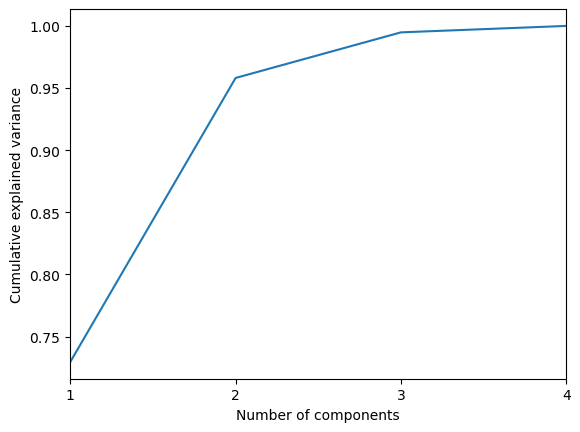

In [55]:
cumsum = np.cumsum(eig_vals[idx]) / np.sum(eig_vals[idx])
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)

The array above clearly shows that 72.96% of the variance can be explained by the first principal component alone. The second principal component 22.85% of the information while the third and fourth principal components can safely be dropped without losing information. Together, the first two principal components contain 95.81% of the information. From the plot, we can see that over 95% of the variance is captured within the two largest principal components. Therefore, it is acceptable to choose the first two largest principal components to make up the projection matrix W.

The parameter n_components allows us to select how many principle components we want to reduce our features to, in this case 2. Let’s look at the Iris dataset again, now with only two features. (In other words, we’ve reduced the size of our data by 50%). 

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(standard)

In [63]:
pca2_df = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

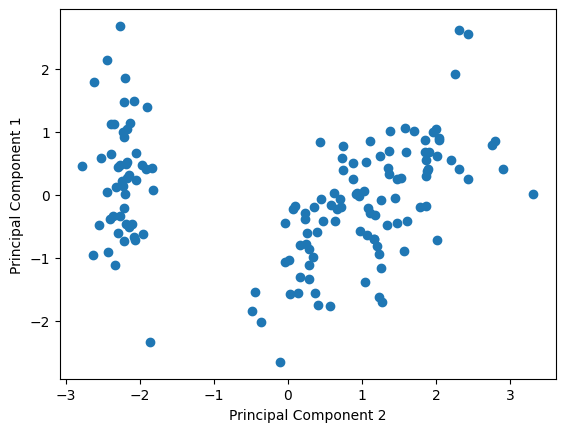

In [77]:
plt.scatter(pca2_df['pca1'], pca2_df['pca2'])
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.show()

Even though we’ve reduced our data by half, we still have two principle components which contain the majority of the statistical variance in the original data, and clustering or classification would still be an easy task. Even if we reduce all four components to just one, throwing out a massive 72.96% of our original data:

In [78]:
pca_n1 = PCA(n_components=1)
solo_PrincipalComponent = pca_n1.fit_transform(standard)

In [79]:
zeros = [0 for i in range(150)]
solo_components = []
for i in solo_PrincipalComponent:
    solo_components.append(i[0])

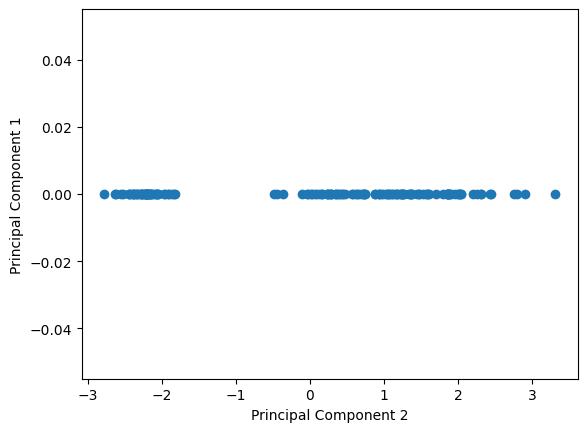

In [83]:
plt.scatter(solo_components,zeros)
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.show()

https://emanuelfontelles.github.io/blog/Principal-Component-Analysis.html <br> 2. https://medium.com/@kyasar.mail/pca-principal-component-analysis-729068e28ec8 <br> 3.https://medium.com/swlh/an-intuitive-approach-to-pca-fc4d05c14c19<br> 4. https://github.com/bphall/pca_sandbox/blob/master/pca_sandbox.ipynb <br> 5. https://towardsdatascience.com/a-step-by-step-introduction-to-pca-c0d78e26a0dd